# JUAN SIMON SUAREZ ALVARADO #
## ANALISIS DE DATOS ##
### UNAD ###

In [5]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [6]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')

In [7]:
Datos.shape

(200, 5)

In [8]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
Datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
missing_data = Datos.isnull().sum().reset_index()
missing_data.columns = ['Columna', 'Valores Faltantes']
missing_data = missing_data[missing_data['Valores Faltantes'] > 0].sort_values(by='Valores Faltantes', ascending=False)

print("Valores faltantes por columna:")
print(missing_data)

Valores faltantes por columna:
Empty DataFrame
Columns: [Columna, Valores Faltantes]
Index: []


## Detección de Datos Atípicos ##
El objetivo de encontrar datos atípicos es identificar observaciones que son significativamente diferentes del resto del conjunto de datos. 

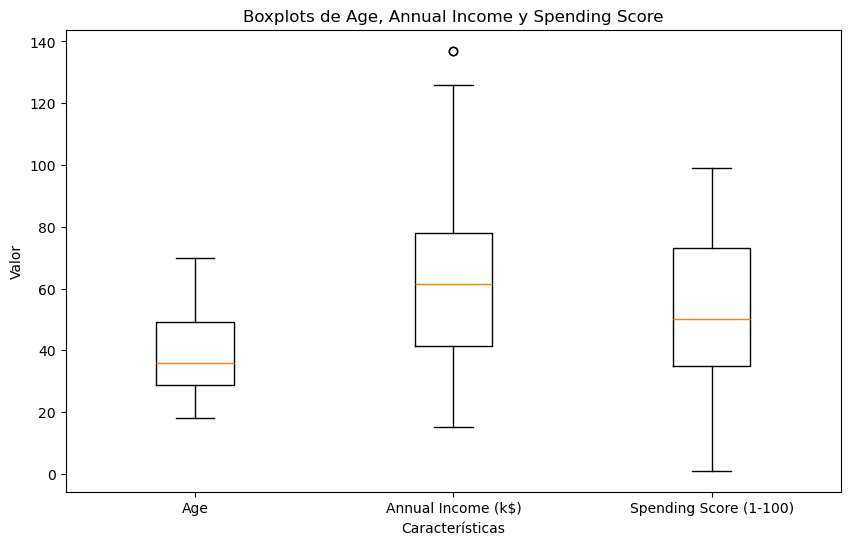

In [13]:
# Seleccionar las columnas relevantes
columns_of_interest = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Crear los boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(Datos[columns_of_interest].values, labels=columns_of_interest)
plt.title('Boxplots de Age, Annual Income y Spending Score')
plt.ylabel('Valor')
plt.xlabel('Características')
plt.show()


**Se logra identificar a través de los gráficos que la columna 'Annual Income' posee algunos datos que se podrían considerar atípicos.**

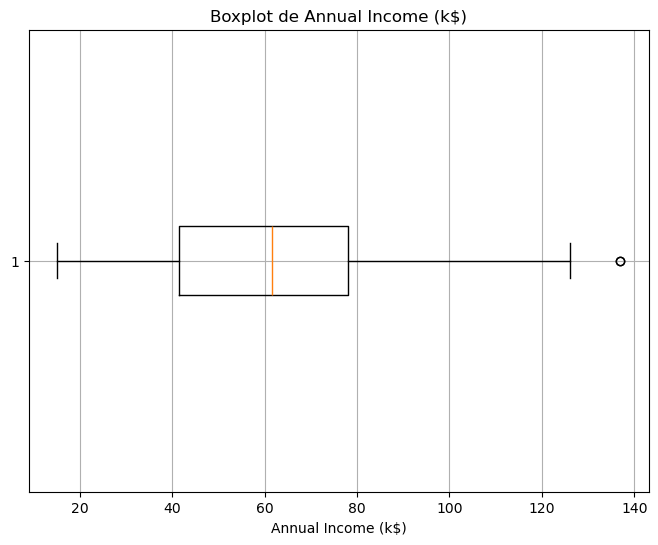

In [15]:
# Crear el boxplot para 'Annual Income (k$)'
plt.figure(figsize=(8, 6))
plt.boxplot(Datos['Annual Income (k$)'], vert=False)
plt.title('Boxplot de Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.grid(True)
plt.show()


In [16]:
# Filtrar el DataFrame para encontrar registros con 'Annual Income (k$)' superior a 120k
registro_superior_120k = Datos[Datos['Annual Income (k$)'] > 130]

# Mostrar el registro encontrado
print("Registro con 'Annual Income (k$)' superior a 120k:")
print(registro_superior_120k)

Registro con 'Annual Income (k$)' superior a 120k:
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


### Hallazgos de Registros Atípicos en 'Annual Income'

Se identificaron dos registros con valores atípicos en la columna 'Annual Income (k$)'. Estos valores excepcionales sugieren la posibilidad de errores en la recolección de datos o situaciones poco comunes. Se recomienda considerar la eliminación de estos registros para mejorar la calidad del análisis de datos.

In [17]:
# Imprimir cantidad de registros con cero en 'Age'
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())

# Imprimir cantidad de registros con cero en 'Annual Income (k$)'
print("Cantidad de Registros con cero en 'Annual Income (k$)': ", Datos['Annual Income (k$)'].isin([0]).sum())

# Imprimir cantidad de registros con cero en 'Spending Score (1-100)'
print("Cantidad de Registros con cero en 'Spending Score (1-100)': ", Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en 'Annual Income (k$)':  0
Cantidad de Registros con cero en 'Spending Score (1-100)':  0


**Se realizó un análisis para verificar la presencia de valores cero en tres columnas específicas del conjunto de datos: 'Age', 'Annual Income (k$)' y 'Spending Score (1-100)'. Los resultados mostraron que no había registros con valor cero en ninguna de estas columnas, lo que sugiere que los datos no contienen valores cero y están completos en estas áreas.**

In [18]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
# Paso 2: Seleccionar características
X = Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

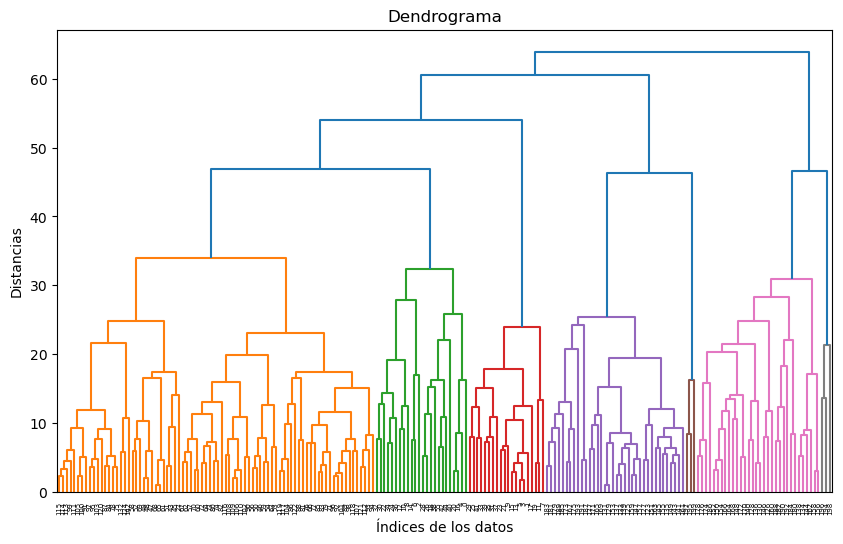

Silhouette Score: 0.43542057757306424
Davies-Bouldin Score: 0.8342775603770459
Calinski-Harabasz Score: 146.61389077077823


In [25]:
# Realizar el clustering jerarquico
linked = linkage(X, 'average')

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índices de los datos')
plt.ylabel('Distancias')
plt.show()


# Crear el modelo de clustering jerárquico
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='average')
# Ajustar el modelo a los datos
clusters = cluster_model.fit_predict(X)

# Calcular las métricas de evaluación
silhouette = silhouette_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)
calinski_harabasz = calinski_harabasz_score(X, clusters)

# Imprimir las métricas
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)
print("Calinski-Harabasz Score:", calinski_harabasz)



**Este dendrograma muestra cómo los clientes se agrupan en diferentes clústeres basados en sus características de edad, ingresos anuales y puntaje de gastos. Los clústeres más grandes y anchos, como los de color naranja y azul claro, representan grupos de clientes con características similares en cuanto a estas tres variables.
Por ejemplo, el clúster naranja podría estar formado por clientes más jóvenes con ingresos y puntajes de gastos más bajos, mientras que el clúster azul claro podría agrupar a clientes de mayor edad con ingresos y puntajes de gastos más altos.
Los clústeres más pequeños y estrechos, como los de color rosa y morado, podrían representar grupos de clientes con características más únicas o atípicas en comparación con el resto.** 

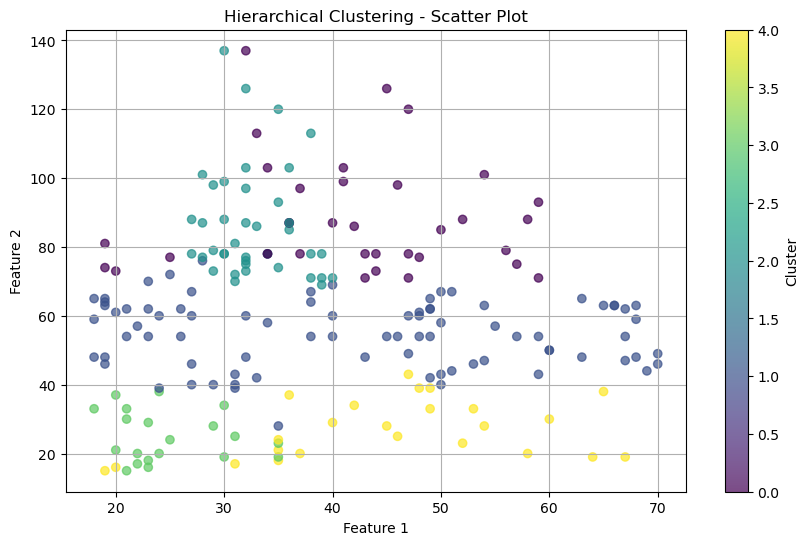

In [26]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering - Scatter Plot')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**La dispersión de los puntos y su agrupamiento por color nos permite identificar la estructura de los clusters en el espacio de las características. Los puntos que están más cerca unos de otros tienden a pertenecer al mismo cluster, mientras que aquellos que están más alejados tienden a estar en diferentes clusters. 
Al observar el gráfico, podemos identificar la presencia de diferentes agrupamientos o conglomerados de puntos, lo que indica la existencia de diferentes patrones o subgrupos dentro de los datos. La distribución de los puntos y la separación entre los clusters nos proporciona información sobre la similitud o diferencia entre las observaciones en función de las características consideradas en el análisi**s.



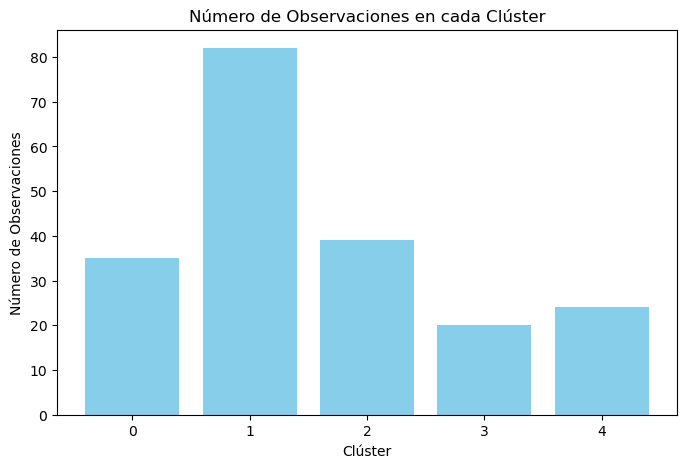

In [33]:
# Contar el número de observaciones en cada clúster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Graficar el número de observaciones en cada clúster
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Clúster')
plt.ylabel('Número de Observaciones')
plt.title('Número de Observaciones en cada Clúster')
plt.show()




**El gráfico muestra la distribución de observaciones en cada cluster generado por el modelo de clustering. Podemos observar que el cluster 1 tiene el mayor número de observaciones, seguido por el cluster 2. Los clusters 0 y 4 tienen un número similar de observaciones, mientras que el cluster 3 es el menos representado en el conjunto de datos.**